In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

prem_table = pd.read_html('https://www.bbc.co.uk/sport/football/premier-league/table')
Premier_table = prem_table[0]

print(len(prem_table))
print(type(prem_table))

print(Premier_table.head(6))


Premier_table.columns
#['Unnamed: 0', 'Unnamed: 1', 'Team', 'P', 'W', 'D', 'L', 'F', 'A', 'GD','Pts', 'Form']

Premier_league = Premier_table.drop(['Unnamed: 1'], axis=1)
Premier_league.head(6)
Premier_league.dtypes
Premier_league[['P', 'W', 'D', 'L', 'F', 'A', 'GD','Pts']] = Premier_league[['P', 'W', 'D', 'L', 'F', 'A', 'GD','Pts']].apply(pd.to_numeric, errors='coerce')

1
<class 'list'>
  Unnamed: 0         Unnamed: 1       Team     P     W    D     L     F     A  \
0          1  team hasn't moved   Man City  38.0  32.0  2.0   4.0  95.0  23.0   
1          2  team hasn't moved  Liverpool  38.0  30.0  7.0   1.0  89.0  22.0   
2          3  team hasn't moved    Chelsea  38.0  21.0  9.0   8.0  63.0  39.0   
3          4  team hasn't moved  Tottenham  38.0  23.0  2.0  13.0  67.0  39.0   
4          5  team hasn't moved    Arsenal  38.0  21.0  7.0  10.0  73.0  51.0   
5          6  team hasn't moved    Man Utd  38.0  19.0  9.0  10.0  65.0  54.0   

     GD   Pts                                               Form  
0  72.0  98.0  WWon 1 - 0 against Tottenham Hotspur on April ...  
1  67.0  97.0  WWon 2 - 0 against Chelsea on April 14th 2019....  
2  24.0  72.0  LLost 0 - 2 against Liverpool on April 14th 20...  
3  28.0  71.0  LLost 0 - 1 against Manchester City on April 2...  
4  22.0  70.0  LLost 2 - 3 against Crystal Palace on April 21...  
5  11.0  66.0

In [30]:
Premier_league.drop(Premier_league.tail(1).index, inplace=True)
Premier_league.tail(3)
Premier_league.shape
Premier_league.rename(columns={'Unnamed: 0':'Position'}, inplace=True)
Premier_league['Goal Ratio'] = round(Premier_league['F']/Premier_league['A'],1)
Premier_league = Premier_league[['Position','Team','P','W','D','L','F','A','Goal Ratio','GD','Pts','Form']]
Premier_league['Goals/game'] = round((Premier_league['F'] / Premier_league['P']), 1)
Premier_league['Goals conceded/game'] = round((Premier_league['A'] / Premier_league['P']), 1)


In [148]:
#Premier_league
leading_level_trailing = pd.read_html('https://www.soccerstats.com/table.asp?league=england&tid=t')


In [63]:
leading_level_trailing = pd.DataFrame(leading_level_trailing[6][5:25]).iloc[:,0:9]
leading_level_trailing.columns = ['Team','Played','Average_Mins_Leading','Average_Mins_Level','Average_Mins_Trailing','Disto','Total_Mins_Leading','Total_Mins_Level','Total_Mins_Trailing']
leading_level_trailing.pop('Disto')


,Team,Played,Average_Mins_Leading,Average_Mins_Level,Average_Mins_Trailing,Disto,Total_Mins_Leading,Total_Mins_Level,Total_Mins_Trailing
5,Arsenal,38,32.4,39.5,18.0,NaN,1233,1502,685
6,Bournemouth,38,22.8,35.3,31.9,NaN,866,1343,1211
7,Brighton,38,14.8,41.6,33.6,NaN,563,1579,1278
8,Burnley,38,18.3,41.2,30.6,NaN,694,1564,1162
9,Cardiff City,38,11.9,42.1,35.9,NaN,454,1600,1366


In [114]:
Team_shorthand = ['ARS', 'BOU', 'BRI', 'BUR', 'CAR', 'CHEL', 'CRP', 'EVE','FUL','HUD', 'LEI', 'LIV', 'MNC',\
                'MNU', 'NEW', 'SOU', 'TOT','WAT', 'WHU', 'WOL']
leading_level_trailing['Team_abbreviation'] = Team_shorthand

Prem_shorthand = ['MNC', 'LIV', 'CHEL', 'TOT', 'ARS', 'MNU', 'WOL', 'EVE', 'LEI', 'WHU', 'WAT', 'CRP', 'NEW', \
                 'BOU', 'BUR', 'SOU', 'BRI', 'CAR', 'FUL', 'HUD']
Premier_league['Team_abbreviation'] = Prem_shorthand
Merged_premier_league_table = pd.merge(Premier_league, leading_level_trailing[leading_level_trailing.columns[2:]], on='Team_abbreviation', how='left')

In [68]:
import requests
r = requests.get('https://www.radiotimes.com/news/sport/2019-05-12/premier-league-prize-money-2018-2019/')
from bs4 import BeautifulSoup
soup = BeautifulSoup(r.text, 'html.parser')
result_1 = soup.findAll('ol')
prize_money_scrape = result_1[1]
earnings = prize_money_scrape.contents[1::2]

In [115]:
records = [element.text for element in earnings]
records = pd.Series(records).str.split(' – ', n=1, expand=True)
records.columns = ['Earnings', 'Team_abbreviation']
records['Earnings'] = records['Earnings'].str.replace(r'[£m]','')
records['Team_abbreviation'] = Prem_shorthand
Merged_premier_league_table = pd.merge(Merged_premier_league_table, records, on='Team_abbreviation', how='left')
Merged_premier_league_table.rename({'Earnings': 'Prize_Money_Millions'}, axis='columns', inplace=True)

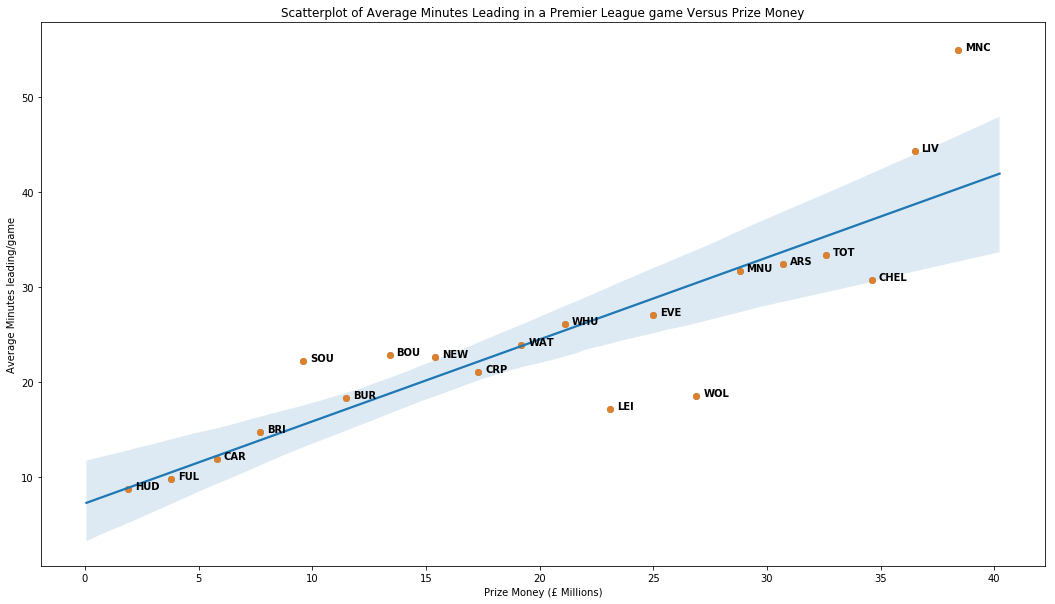

In [147]:
Merged_premier_league_table[['Prize_Money_Millions','Average_Mins_Leading']] = Merged_premier_league_table[['Prize_Money_Millions','Average_Mins_Leading']].apply(pd.to_numeric, errors='coerce')
scatter, ax = plt.subplots()
plt.gcf().set_size_inches(18, 10)
sns.regplot(x='Prize_Money_Millions', y='Average_Mins_Leading', data=Merged_premier_league_table)
ax = sns.regplot(x='Prize_Money_Millions', y='Average_Mins_Leading', data=Merged_premier_league_table, fit_reg=False,marker='o')
ax.set_title('Scatterplot of Average Minutes Leading in a Premier League game Versus Prize Money')
ax.set_xlabel('Prize Money (£ Millions)')
ax.set_ylabel('Average Minutes leading/game')

for line in range(0,Merged_premier_league_table.shape[0]):
    #ax.annotate('Halloween', xy=(Merged_premier_league_table.loc[line,'Prize_Money_Millions'], Merged_premier_league_table.loc[line,'Average_Mins_Leading']),  xycoords='data',xytext=(-5, -5), textcoords='offset points')
    ax.text(Merged_premier_league_table.loc[line,'Prize_Money_Millions']+0.3, Merged_premier_league_table.loc[line,'Average_Mins_Leading'], Merged_premier_league_table.loc[line,'Team_abbreviation'],
            horizontalalignment='left',size='medium',color='black',weight='semibold')
plt.show()


In [142]:
Merged_premier_league_table

,Position,Team,P,W,D,L,F,A,Goal Ratio,GD,...,Goals conceded/game,Team_abbreviation,Average_Mins_Leading,Average_Mins_Level,Average_Mins_Trailing,Disto,Total_Mins_Leading,Total_Mins_Level,Total_Mins_Trailing,Prize_Money_Millions
0,1,Man City,38.0,32.0,2.0,4.0,95.0,23.0,4.1,72.0,...,0.6,MNC,54.9,31.6,3.5,NaN,2088,1200,132,38.4
1,2,Liverpool,38.0,30.0,7.0,1.0,89.0,22.0,4.0,67.0,...,0.6,LIV,44.3,41.2,4.4,NaN,1685,1566,169,36.5
2,3,Chelsea,38.0,21.0,9.0,8.0,63.0,39.0,1.6,24.0,...,1.0,CHEL,30.7,44.1,15.2,NaN,1166,1675,579,34.6
3,4,Tottenham,38.0,23.0,2.0,13.0,67.0,39.0,1.7,28.0,...,1.0,TOT,33.3,40.9,15.8,NaN,1266,1554,600,32.6
4,5,Arsenal,38.0,21.0,7.0,10.0,73.0,51.0,1.4,22.0,...,1.3,ARS,32.4,39.5,18.0,NaN,1233,1502,685,30.7
5,6,Man Utd,38.0,19.0,9.0,10.0,65.0,54.0,1.2,11.0,...,1.4,MNU,31.7,37.6,20.8,NaN,1204,1427,789,28.8
6,7,Wolves,38.0,16.0,9.0,13.0,47.0,46.0,1.0,1.0,...,1.2,WOL,18.5,44.2,27.3,NaN,702,1679,1039,26.9
7,8,Everton,38.0,15.0,9.0,14.0,54.0,46.0,1.2,8.0,...,1.2,EVE,27.1,44.6,18.4,NaN,1028,1693,699,25.0
8,9,Leicester,38.0,15.0,7.0,16.0,51.0,48.0,1.1,3.0,...,1.3,LEI,17.2,42.7,30.1,NaN,655,1621,1144,23.1
9,10,West Ham,38.0,15.0,7.0,16.0,52.0,55.0,0.9,-3.0,...,1.4,WHU,26.1,37.0,26.8,NaN,993,1407,1020,21.1
